## Data Cleaning

#### <i>provides features and target variables to local directory to import in Machine Learning and Statistical Analysis

<font color='blue'>Steps followed:<br>1) Remove any rows with null values<br>2) Encode the 2 classifiers as binary<br> 3) Remove outliers<br>4) Lastly Generate variables needed for analysis and modeling and pass to local drive<br><br>
<font color='black'>Variables:<br><p>df:&nbsp;&nbsp; 6 Features: incidence, degree, radius, slope, tilt, angle, ; 2 Binary Targets: category & class.<br>&nbsp;X:&nbsp;&nbsp; predictor variables, or features<br>Y1: &nbsp;&nbsp;target varible for 'class' 1=Normal (100), 0=Abnormal (210)<br>Y2: &nbsp;&nbsp;target variable for 'category';  1=Normal (60), 0 = Hernia (100), 2= Spondylolesthesis (150)

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load 2 files containing 6 identical orthopedic features and their 2 classification columns.


In [41]:
classify = pd.read_csv('Data/weka2c.csv')
category = pd.read_csv('Data/weka3c.csv')

#### Merge the files, rename columns, and drop rows with null values

In [42]:
df = pd.merge(category, classify, on='degree_spondylolisthesis', how='right')
df2 = df[['pelvic_incidence_x', 'pelvic_tilt', 'lumbar_lordosis_angle_x', 'sacral_slope_x', 'pelvic_radius_x', 'degree_spondylolisthesis','class_x','class_y']]
df = df2.rename(columns = {'pelvic_incidence_x':'incidence', 'pelvic_tilt': 'tilt', 'lumbar_lordosis_angle_x': 'angle', 'sacral_slope_x': 'slope', 'pelvic_radius_x': 'radius', 'degree_spondylolisthesis' : 'degree', 'class_x' : 'category', 'class_y':'class'}).dropna()

#### Create variables with appropriate data for analysis and ML

In [43]:
# encode the target variables to boolean
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# encode category as boolean
df.iloc[:,6] = label_encoder.fit_transform(df.iloc[:,6])
df.iloc[:,6] = np.ravel(df.iloc[:,6])
# encode class as boolean
df.iloc[:,7] = label_encoder.fit_transform(df.iloc[:,7])
df.iloc[:,7] = np.ravel(df.iloc[:,7])

In [44]:
# data, predictor variables, features
X = df.drop(['category', 'class'],axis=1)

#### Quick plot of the shape of the data displays an obvious outlier in the degree feature >360 degrees

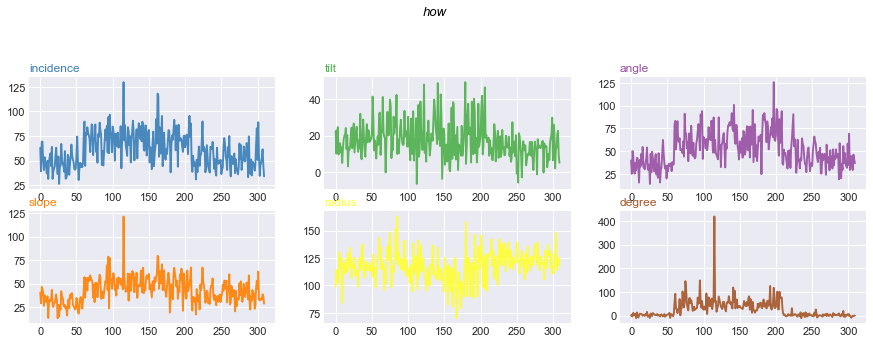

In [45]:
def feature_plt(P):
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')
    num = 0
    for column in P:
        num+=1
        plt.subplot(3,3, num)
        plt.plot(P[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
    
        if num in range(7) :
            plt.tick_params(labelbottom='off')
        if num not in [1,4,7] :
            plt.tick_params(labelleft='off')
    
        plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))

    plt.suptitle("how", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
feature_plt(X)

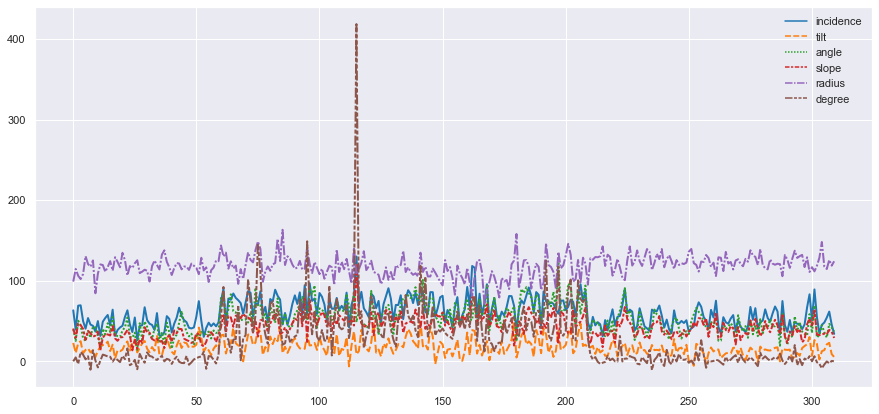

In [46]:
sns.set(rc={'figure.figsize':(15,7)})
sns.lineplot(data=original, palette="tab10", linewidth=2)

#### Remove the outlier and display plot to confirm - notice the remaining features also now are smoother, the single record seemed to contain several potential outliers.

In [47]:
# remove the oulier, values > 360
X = X.loc[X['degree'] <= 360].copy(deep=True)
df = df.loc[df['degree'] <= 360].copy(deep=True)

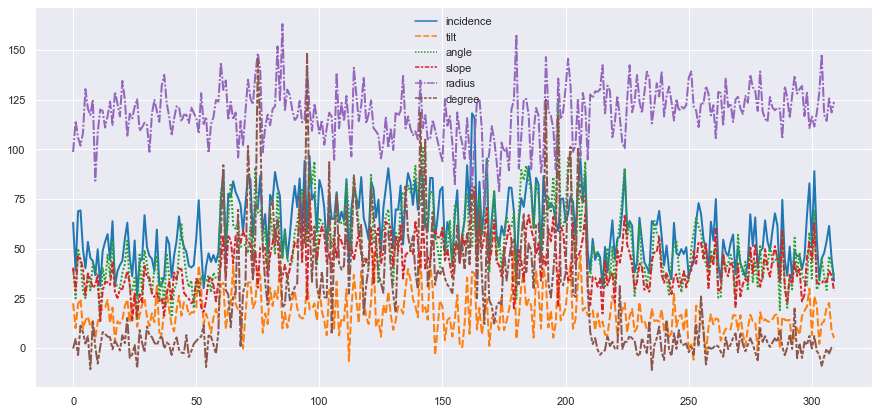

In [48]:
sns.set(rc={'figure.figsize':(15,7)})
sns.lineplot(data=X, palette="tab10", linewidth=2)

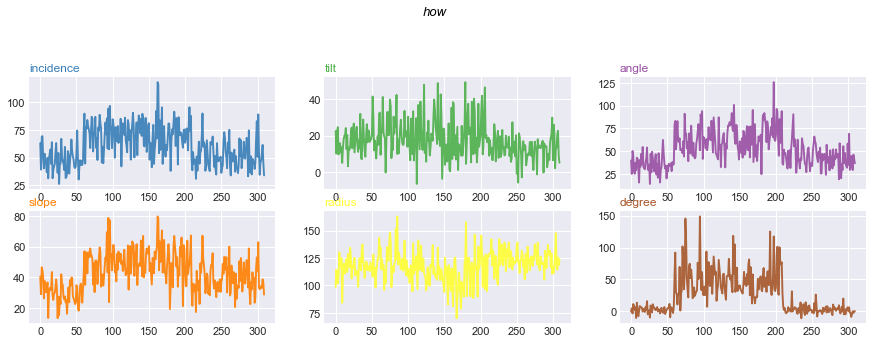

In [49]:
feature_plt(X)

In [50]:
Y1 = df[['class']]
Y2 = df[['category']]

In [51]:
# save feature frames for Machine Learning notebook

df.to_csv('Data/data.csv',index=False)
X.to_csv('Data/X.csv',index=False)
Y1.to_csv('Data/Y1.csv',index=False)
Y2.to_csv('Data/Y2.csv',index=False)